## Fifth Assignment

Lorenzo Domenichetti 2011653


due 16-05

In [1]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'lattice' was built under R version 4.0.5"


### Exercise 1

• A publishing company has recently launched a new journal. 

In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.

a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal ?

b) Assuming a uniform prior, what is the posterior distribution for y ?

c) Plot both posterior and likelihood ditributions functions

a) As no information are provided on the samples, I would assume an uniform prior. But, as known, correlations may be present in a dataset, linking for example age or groupe of people with common interest. Also a beta distribution, drawn from the 29/150 positive responses collected.

b) The posterior probability in the case of a uniform is proportional to the likelihood. The likelihood follows a binomial distribution. We have in this case n = 150, r = 29. 

$$P(p | r, n, M) = \frac{1}{Z} p^r(1-p)^{n-r}$$

Where Z = P(r | n, M) is the normalization factor - does not depend on p.

We will plot in the following cell the posterior - for p. The posterior for y follows multiplying the x-axis.

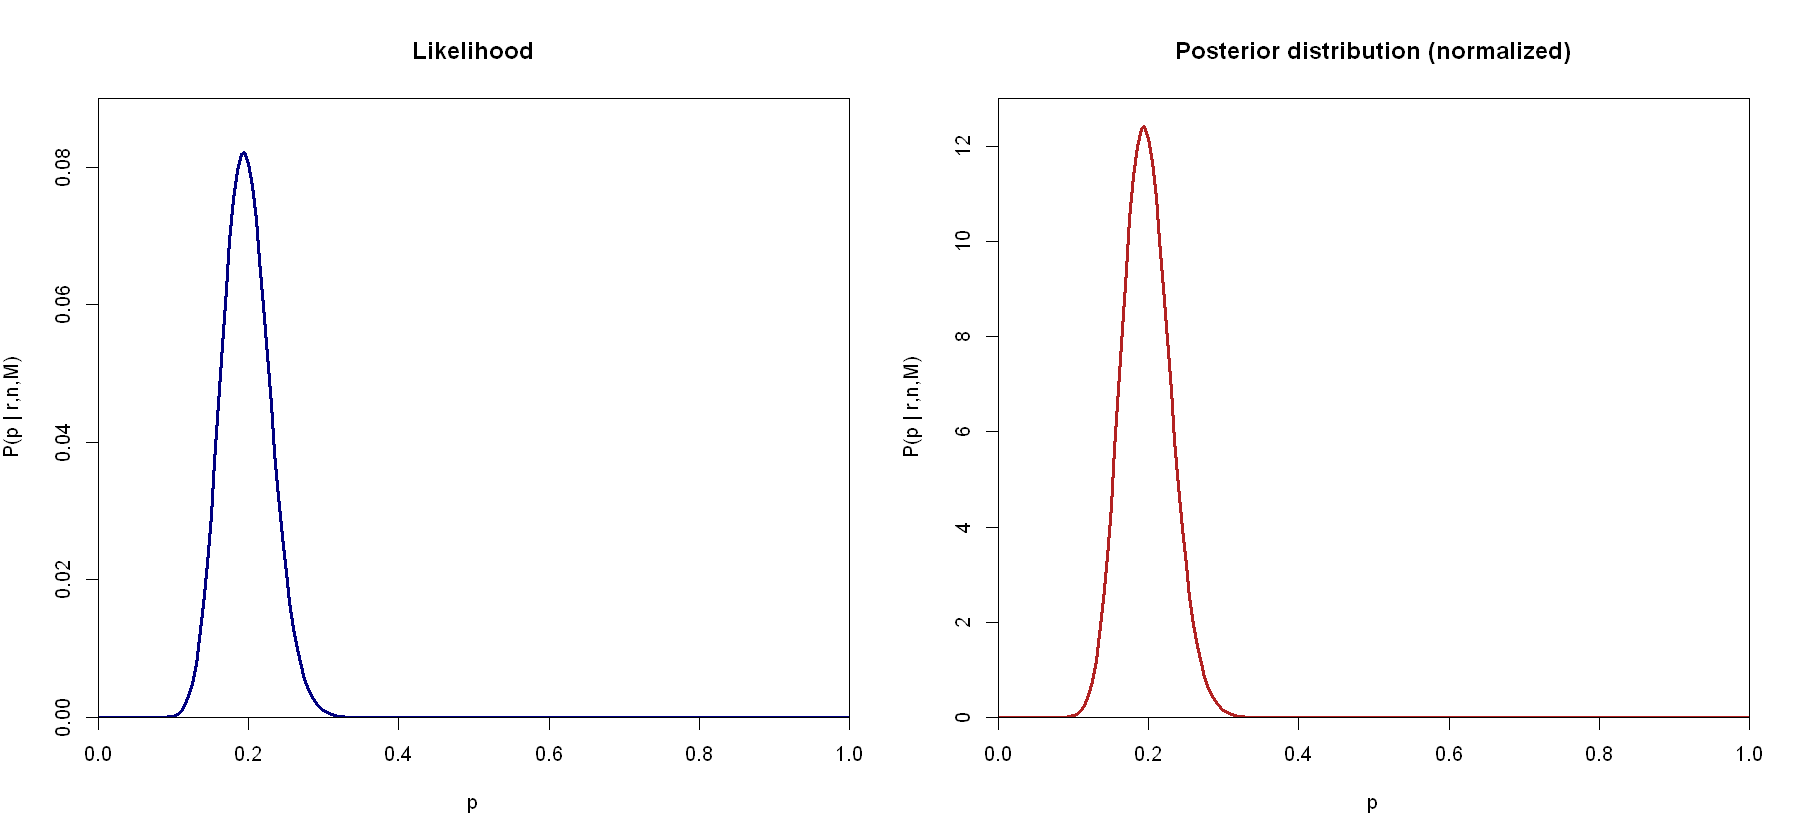

In [2]:
n <- 150
r <- 29
p <- seq(0, 1, length.out = 201)
p.post <- dbinom(x=r, size=n, prob=p)

to_int <- function(p){
    dbinom(x = 29, size = 150, prob = p)
}

options(repr.plot.width=15, repr.plot.height=7)

Z = integrate(to_int , 0, 1)
p.norm <- p.post/Z$value
par(mfrow = c(1,2))
plot(p, p.post, xaxs='i', yaxs='i',  type='l', lty=1, col = 'navy', lwd = 3, ylim=c(0,0.09), xlab="p", ylab=expression(paste("P(p | r,n,M)")), main =  "Likelihood")
plot(p, p.norm, xaxs='i', yaxs='i',  type='l', lty=1, col = 'firebrick', lwd = 3, ylim=c(0,13), xlab="p", ylab=expression(paste("P(p | r,n,M)")), main =  "Posterior distribution (normalized)")


### Exercise 2
• Three students want to construct their prior probability about the proportion of residents that
support the building of a new concert hall in their small town.

• Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

• Benny moved only recently to this new town and therefore he does non have the slightest idea about
it. Therefore he decides to use a uniform prior.

• Chris believes that his prior should have a trapezoidal shape

\begin{equation}
f(x) = 
    \begin{cases}
     20x   \,\,\,\,\,  0 ≤ x < 0.1  \\
     2 \,\,\,\,\   0.1 ≤ x ≤ 0.3 \\
     5-10x \,\, 0.3 ≤ x ≤ 0.5 \\
     0  \,\,\, x > 0.5
    \end{cases}\,
\end{equation}

a) Draw and compare the three prior distributions.

• The next day the three students decide to interview a sample of 100 citizens of the small town,
asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert
hall.

b) Evaluate and draw the three posterior distributions.

c) Give an estimate of the most probable value and the 95% credibility interval.

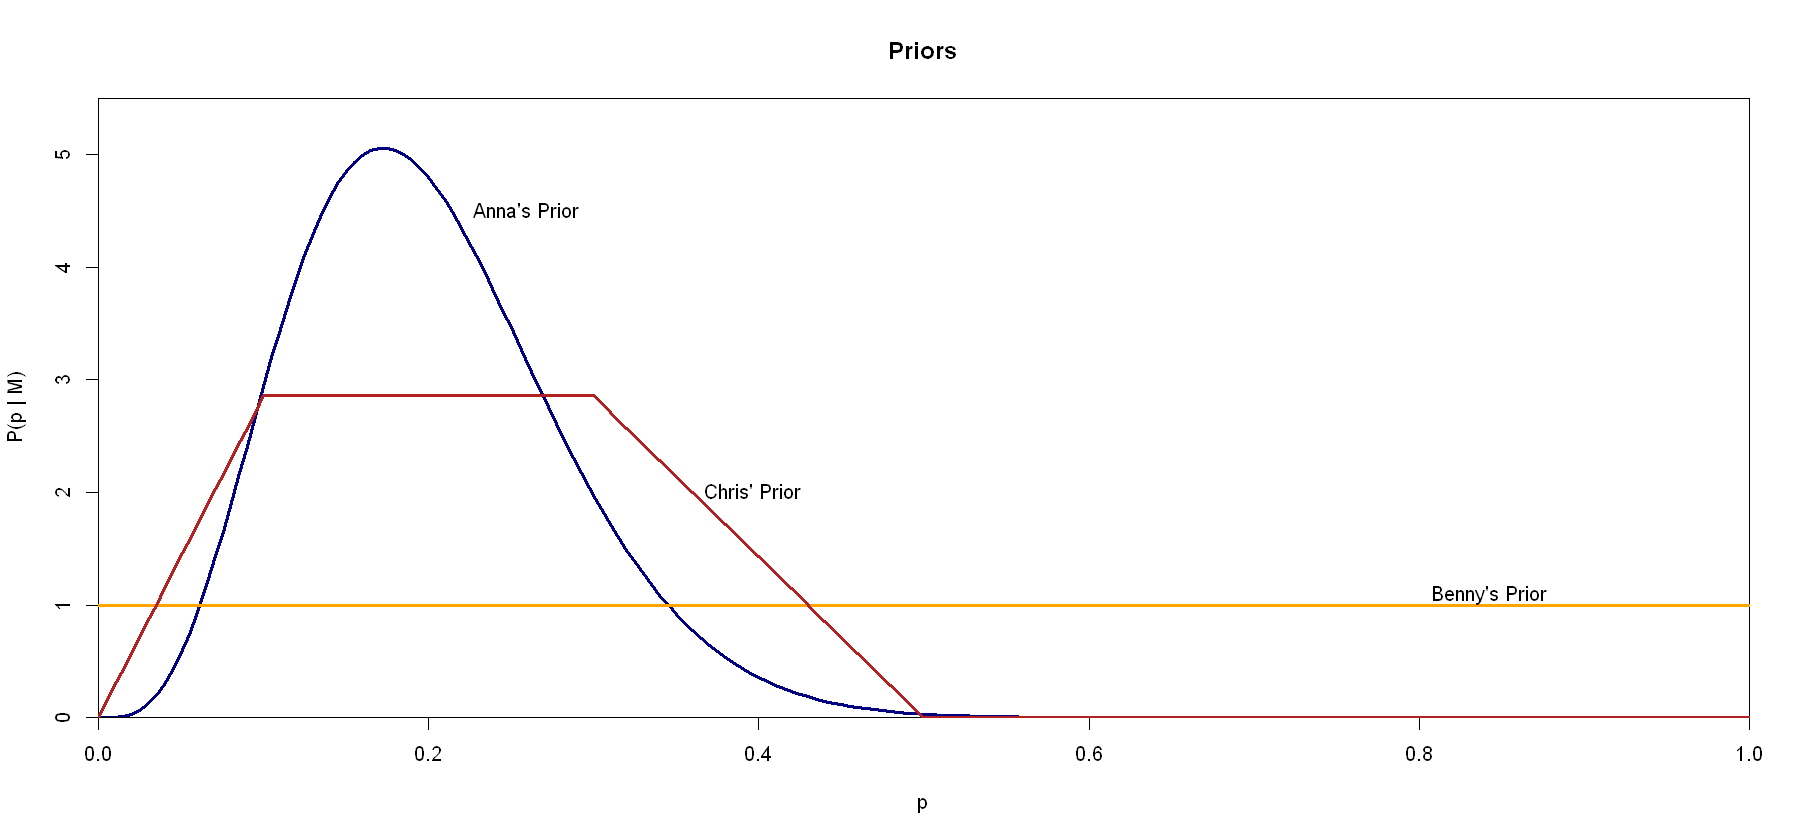

In [3]:
p <- seq(0, 1, length.out = 201)

mu = 0.2
var = 0.08^2
alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2
beta <- alpha * (1 / mu - 1)

anna.prior <- dbeta(p, shape1 = alpha, shape2 = beta)

chris <- function(x){
    if( x > 0 & x < 0.1){
        return(20*x)
    } else if ( x >= 0.1 & x <= 0.3 ){
        return(2)
    } else if ( x >= 0.3 & x <= 0.5 ){
        return(5-10*x)
    } else if ( x >= 0.5 & x <= 1 ){
        return(0)
    } else {
        return(0)
    }
}

norm_chris <- function(x){
    return(x/0.7)
}

chris.prior <- lapply(p, chris)
chris.prior <- lapply(chris.prior, norm_chris)


plot(p, anna.prior , xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd = 3, ylim=c(0,5.5), xlab="p", ylab=paste("P(p | M)"), main="Priors")
lines(p, rep(1,length(p)), col='orange', type='l', lty=1, lwd = 3)
lines(p, chris.prior, col='firebrick', type='l', lty=1, lwd = 3)
text(x=0.22, y=4.5, pos=4, labels='Anna\'s Prior')
text(x=0.8, y=1.1, pos=4, labels='Benny\'s Prior')
text(x=0.36, y=2, pos=4, labels='Chris\' Prior')


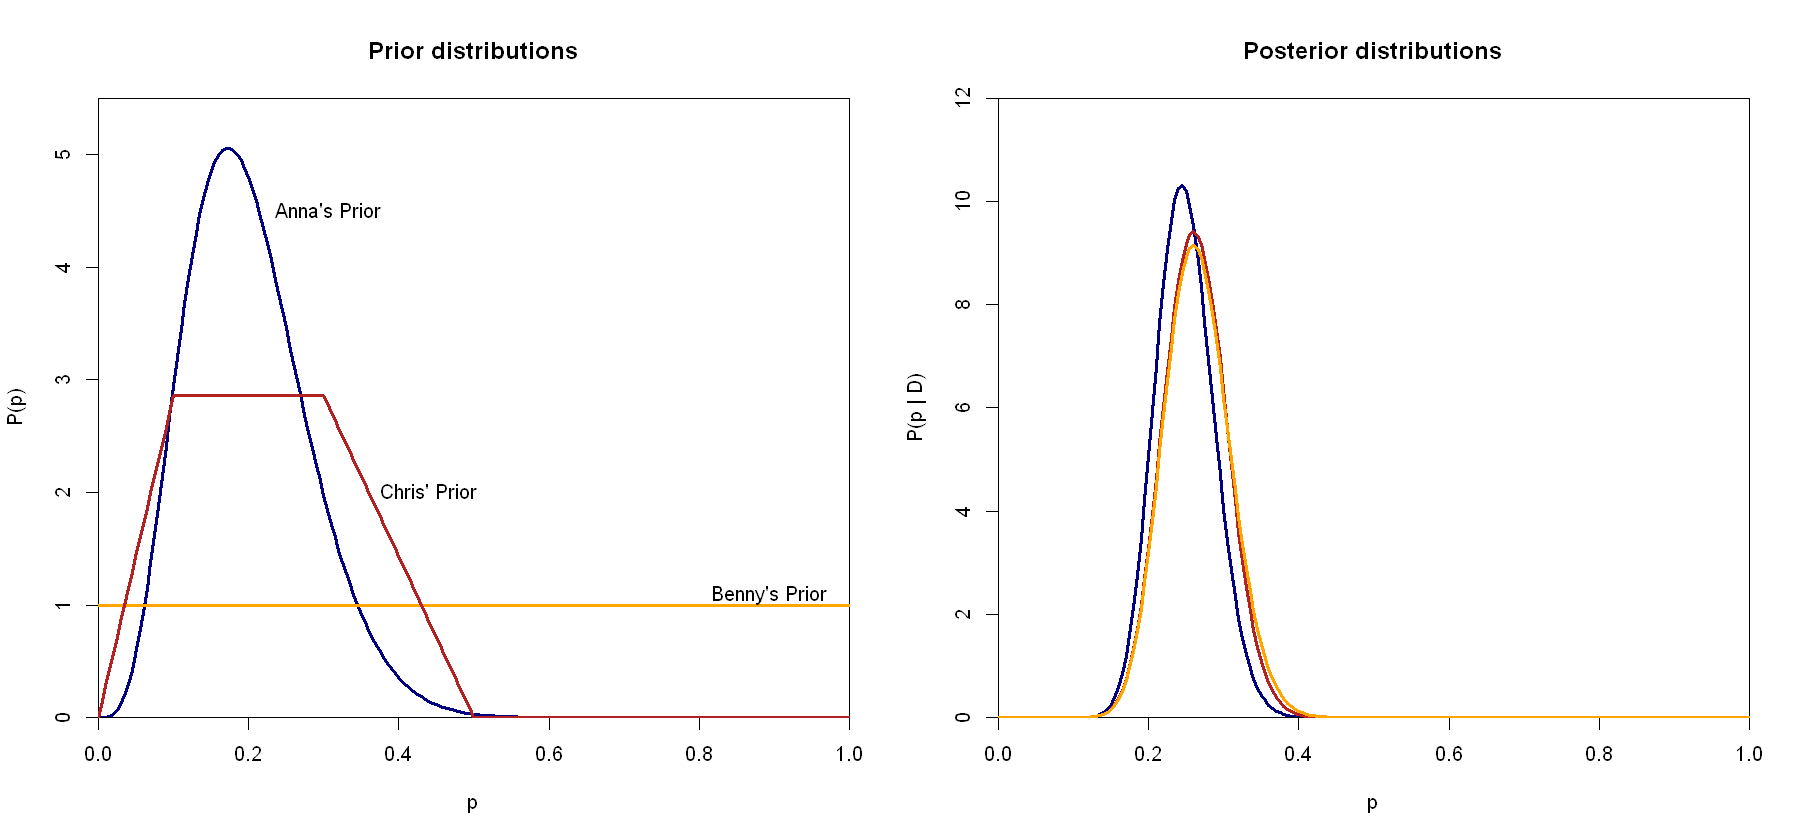

In [4]:
mu = 0.2
var = 0.08^2
alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2
beta <- alpha * (1 / mu - 1)

ret_anna <- function(probab, a = alpha, b = beta){
    dbinom(x=26, size=100, prob=probab) * dbeta(probab, shape1 = a, shape2 = b)/0.02995416
}

ret_benny <- function(probab){
    dbinom(x=26, size=100, prob=probab) /0.00990099
}

ret_chris <- function(probab){
    dbinom(x=26, size=100, prob=probab) * unlist(lapply(probab, chris)) / 0.02751473 /0.7
}

anna.posterior <- ret_anna(p)
chris.posterior <- ret_chris(p)
benny.posterior <- ret_benny(p)


par(mfrow = c(1,2))

plot(p, anna.prior , xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd = 3, ylim=c(0,5.5), xlab="p", ylab=paste("P(p)"), main="Prior distributions")
lines(p, rep(1,length(p)), col='orange', type='l', lty=1, lwd = 3)
lines(p, chris.prior, col='firebrick', type='l', lty=1, lwd = 3)
text(x=0.22, y=4.5, pos=4, labels='Anna\'s Prior')
text(x=0.8, y=1.1, pos=4, labels='Benny\'s Prior')
text(x=0.36, y=2, pos=4, labels='Chris\' Prior')

plot(p, anna.posterior , xaxs='i', yaxs='i', col='navy', type='l', lty=1, main = 'Posterior distributions', lwd = 3, ylim=c(0,12), xlab="p", ylab=paste("P(p | D)"))
lines(p, chris.posterior, col='firebrick', type='l', lty=1, lwd = 3)
lines(p, benny.posterior, col='orange', type='l', lty=1, lwd = 3)

In [5]:
moves = seq(0.0001,1,0.001)

pchris = p[which.max(chris.posterior)]
prob_chris = 0
i = 1
while(prob_chris < 0.95){
    i = i+1
    inte = integrate(ret_chris, lower = pchris-moves[i], upper = pchris+moves[i])
    prob_chris = inte$value
}
ichris <- i


panna = p[which.max(anna.posterior)]
prob_anna = 0
i = 1
while(prob_anna < 0.95){
    i = i+1
    inte = integrate(ret_anna, lower = panna-moves[i], upper = panna+moves[i])
    prob_anna = inte$value

}
ianna <- i

pbenny = p[which.max(benny.posterior)]
prob_benny = 0
i = 1
while(prob_benny < 0.95){
    i = i+1
    inte = integrate(ret_benny, lower = pbenny-moves[i], upper = pbenny+moves[i])
    prob_benny = inte$value
}
ibenny <- i

message("95% CI for Anna  - [", panna-moves[ianna], ", ",  panna+moves[ianna], "]")
message("95% CI for Benny - [", pbenny-moves[ibenny], ", ", pbenny+moves[ibenny], "]")
message("95% CI for Chris - [", pchris-moves[ichris], ", ", pchris+moves[ichris], "]")

95% CI for Anna  - [0.1689, 0.3211]

95% CI for Benny - [0.1739, 0.3461]

95% CI for Chris - [0.1779, 0.3421]



### Exercise 3
• A coin is flipped n = 30 times with the following outcomes: 
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H (15T, 15H)

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the
data set.



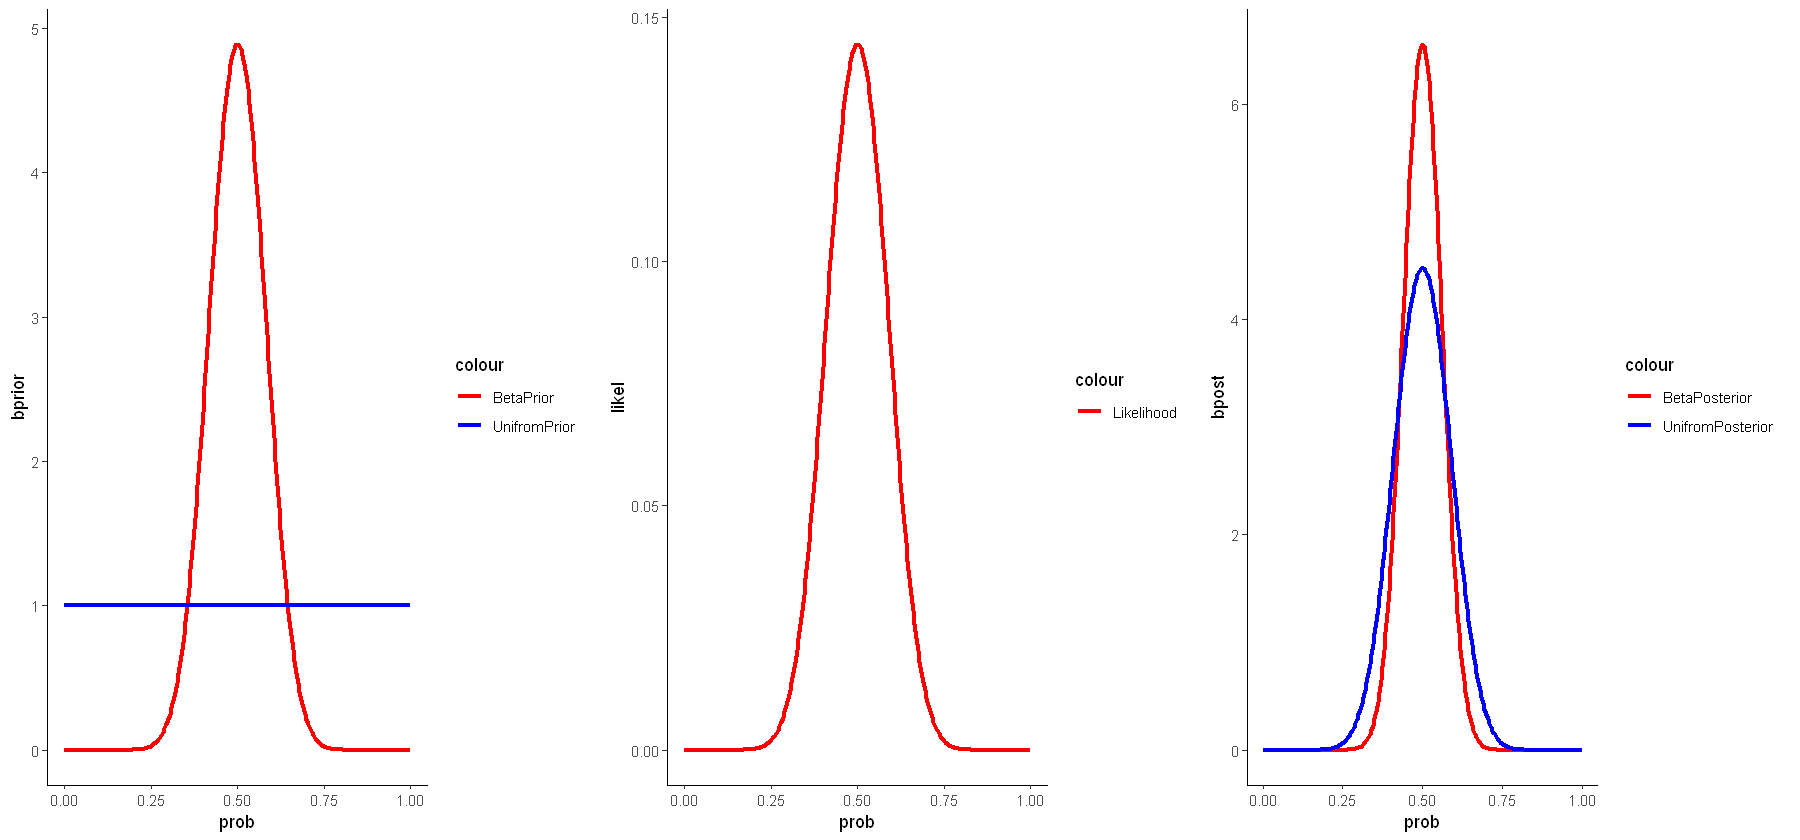

In [6]:
results = c(T, T, T, T, T, F, T, T, F, F, T, T, F, F, F, T, F, T, F, T, F, F, T, F, T, F, T, F, F, F)
p <- seq(0, 1, length.out = 201)

mu = 0.5
var = 0.08^2
alpha_2 <- ((1 - mu) / var - 1 / mu) * mu ^ 2
beta_2 <- alpha_2 * (1 / mu - 1)

beta.prior <- dbeta(p, shape1 = alpha_2, shape2 = beta_2)
unif.prior <- dunif(p)
likelihood <- dbinom(x = 15, size = 30, prob = p)


ret_beta <- function(probab, a = alpha_2, b = beta_2, heads = 15, throws = 30){
    dbinom(x=heads, size=throws, prob=probab) * dbeta(probab, shape1 = a, shape2 = b) / 0.1077206 
}

ret_unif <- function(probab, heads = 15, throws = 30){
     dbinom(x=heads, size=throws, prob=probab)/0.03225806
}


pr_li_post = data.frame(prob = p, bprior = beta.prior, uprior = unif.prior, likel = likelihood, bpost = ret_beta(p), upost = ret_unif(p))


p1 <- ggplot() + geom_line(data = pr_li_post, aes(x = prob, y = bprior, group = "BetaPrior", color ="BetaPrior" ), size = 1.2) +
            geom_line(data = pr_li_post, aes(x = prob, y = uprior, group = "UnifromPrior", color = "UnifromPrior"), size = 1.2) + 
            theme_classic() +    scale_color_manual(values=c('#FF0000','#0000FF'))

p2 <- ggplot() + geom_line(data = pr_li_post, aes(x = prob, y = likel, group = "Likelihood", color ="Likelihood" ), size = 1.2) + 
    theme_classic() +    scale_color_manual(values=c('#FF0000','#0000FF'))

p3 <- ggplot() + geom_line(data = pr_li_post, aes(x = prob, y = bpost, group = "BetaPosterior", color ="BetaPosterior" ), size = 1.2) +
            geom_line(data = pr_li_post, aes(x = prob, y = upost, group = "UnifromPosterior", color = "UnifromPosterior"), size = 1.2) + 
            theme_classic() +    scale_color_manual(values=c('#FF0000','#0000FF'))

options(repr.plot.width=15, repr.plot.height=7)

grid.arrange(p1,p2,p3, ncol = 3, nrow = 1)

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability
distribution, give an estimate for a 95% credibility interval.


In [7]:
moves = seq(0.0001,1,0.001)

pbeta = p[which.max(ret_beta(p, ))]
prob_beta = 0
i = 1
while(prob_beta < 0.95){
    i = i+1
    inte = integrate(ret_beta, lower = pbeta-moves[i], upper = pbeta+moves[i])
    prob_beta = inte$value
}
ibeta <- i

punif = p[which.max(ret_unif(p))]
prob_unif = 0
i = 1
while(prob_unif < 0.95){
    i = i+1
    inte = integrate(ret_unif, lower = punif-moves[i], upper = punif+moves[i])
    prob_unif = inte$value
}
iunif <- i


message("95% CI for Beta Prior    - [", pbeta-moves[ibeta], ", ", pbeta+moves[ibeta], "]")
message("95% CI for Uniform Prior - [", punif-moves[iunif], ", ", punif+moves[iunif], "]")

95% CI for Beta Prior    - [0.3819, 0.6181]

95% CI for Uniform Prior - [0.3299, 0.6701]




c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable
value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to
30).



In [8]:
count_H <- c()
counter <- 0
for (i in results){
    if(!i){
        counter <- counter + 1
    }
    count_H <- c(count_H, counter)
}

In [9]:
moves = seq(0,1,0.001)

beta_results <- matrix(NA, nrow=0, ncol=4)
unif_results <- matrix(NA, nrow=0, ncol=4)


tws = 1
i <- 1
for (hds in count_H){
    pbeta = p[which.max(ret_beta(p, heads = hds, throws = tws))]
    prob_beta = 0
    i = 1
    int_tot_beta = integrate(ret_beta, lower = 0, upper = 1, heads = hds, throws = tws)

    while(prob_beta < 0.95){
        i = i+1
        inte = integrate(ret_beta, lower = pbeta-moves[i], upper = pbeta+moves[i], heads = hds, throws = tws)
        prob_beta = inte$value/int_tot_beta$value
    }
    ibeta <- i

    punif = p[which.max(ret_unif(p, heads = hds, throws = tws))]
    prob_unif = 0
    i = 1
    int_tot_unif = integrate(ret_unif, lower = 0, upper = 1, heads = hds, throws = tws)

    while(prob_unif < 0.95){
        i = i+1
        inf = ifelse(punif-moves[i]>0, punif-moves[i], 0)
        sup = ifelse(punif+moves[i]<1, punif+moves[i], 1)

        inte = integrate(ret_unif, lower = inf, upper =sup, heads = hds, throws = tws)
        prob_unif = inte$value/int_tot_unif$value
    }
    iunif <- i
    inf_unif = ifelse(punif-moves[iunif]>0, punif-moves[iunif], 0)
    
    beta_results <- rbind(beta_results, c(tws, pbeta, pbeta-moves[ibeta], pbeta+moves[ibeta]))
    unif_results <- rbind(unif_results, c(tws, punif, inf_unif, punif+moves[iunif]))
    
    tws <- tws+1
    i <- i+1
   
}

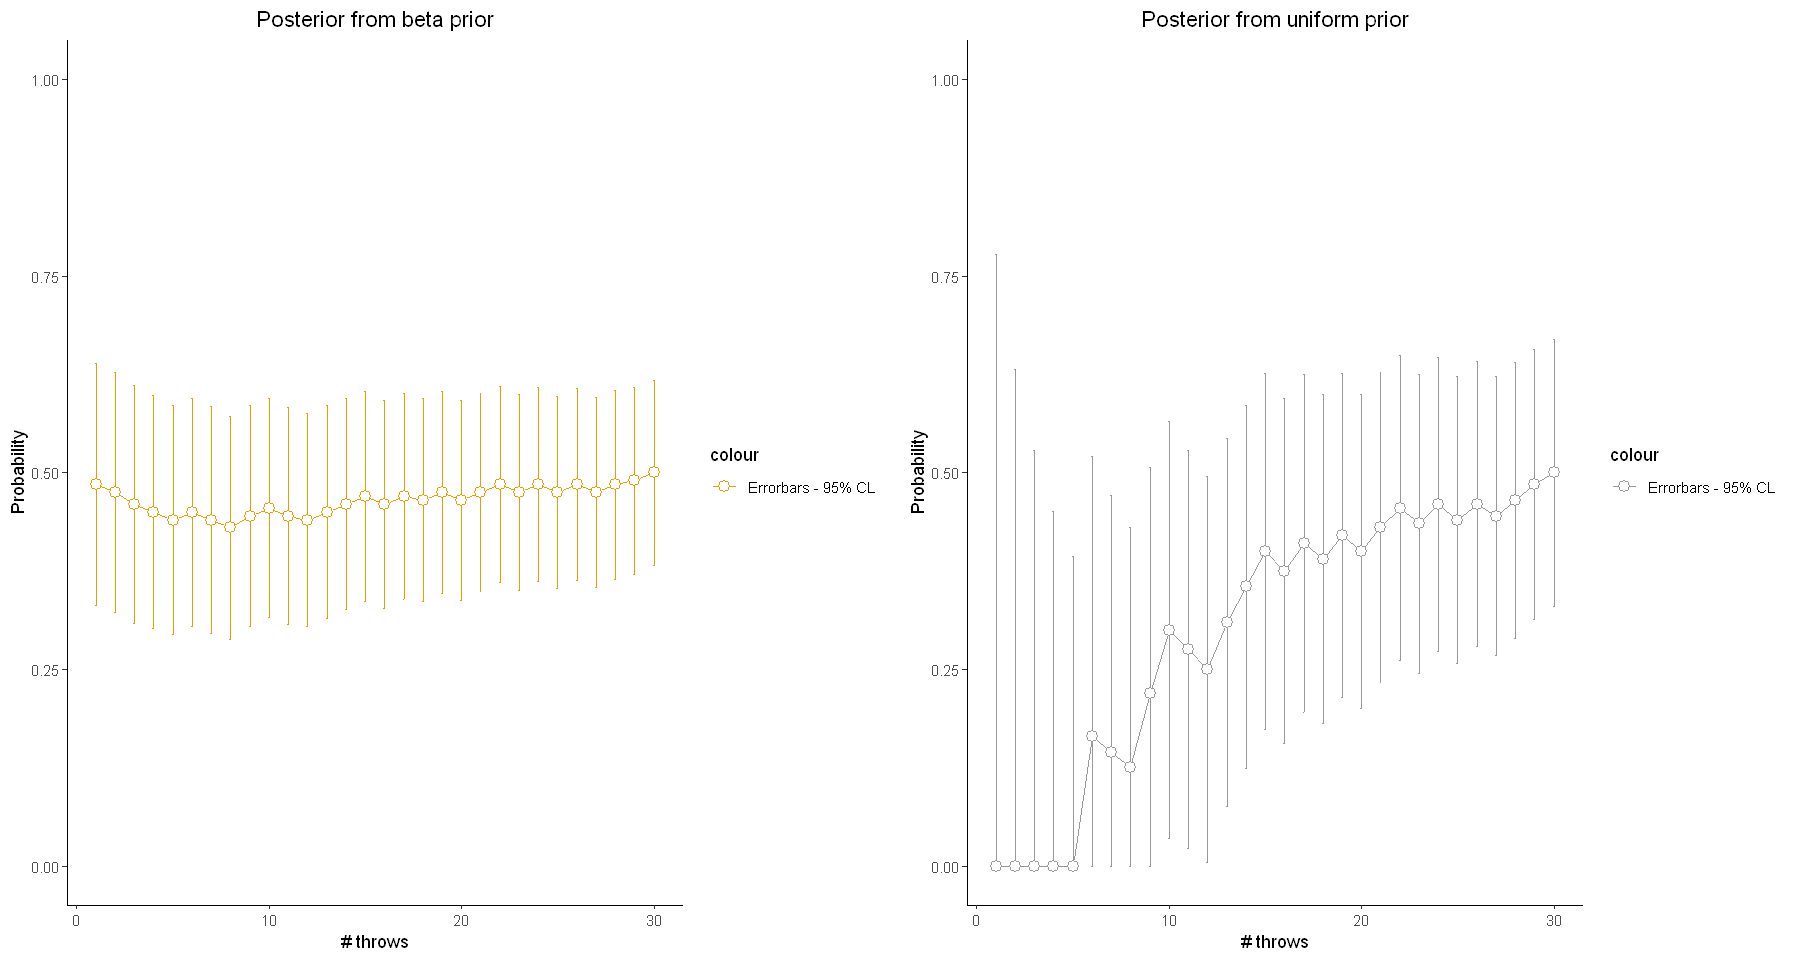

In [10]:
beta_results = as.data.frame(beta_results)
unif_results = as.data.frame(unif_results)

p1 <- ggplot(beta_results, aes(x=V1, y=V2, group = 1, color = 'Errorbars - 95% CL')) +
    geom_line() +
    geom_errorbar(width=.1, aes(ymin=V3, ymax=V4)) +
    geom_point(shape=21, size=3, fill="white") +
    ylim(0,1) +
    labs(title="Posterior from beta prior", x ="# throws", y = "Probability") +
    theme_classic() +
    scale_color_manual(values=c('#E69F00','#999999')) + theme(plot.title = element_text(hjust = 0.5))

p2 <- ggplot(unif_results, aes(x=V1, y=V2, group = 1,  color = 'Errorbars - 95% CL')) +
    geom_line() +
    geom_errorbar(width=.1, aes(ymin=V3, ymax=V4)) +
    geom_point(shape=21, size=3, fill="white") +
    ylim(0,1) +
    labs(title="Posterior from uniform prior", x ="# throws", y = "Probability") +
    theme_classic() + 
    scale_color_manual(values=c('#999999','#E69F00')) + theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width=15, repr.plot.height=8)

grid.arrange(p1,p2, ncol = 2, nrow = 1)

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
(i.e. considering all the data as a whole) ?

The two different graphs have quite a different shape. In the first throws, the presence of a strong prior deeply influences the output. 

Having all first throws tails, in the case of a uniform distribution, sends the uniform prediction down to zero. 

So, it's always preferrable or to run an adequate number of trials, or to select the best prior possible in order to get meaningful results even in the case of low statistics.

It's also worth noticing that the 95% confidence interval shrinks as the number of iteration grows. That is linked to the fact that the posterior gets more and more precise as more measures are analyzed, as expected.